In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_circles

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)
#%matplotlib notebook

# <center>Modelos de clasificación</center>

Los modelos hasta ahora estudiados han tenido por objetivo predecir el valor de una variable objetivo de tipo numérica y continua a partir de features de diversas naturalezas, sean numéricas o categóricas. Pero existen muchos problemas en los cuales la variable a predecir puede representar una determinada clase, por ejemplo, si queremos predecir si un paciente tendrá o no una determinada enfermedad, o si pretendemos tener un algoritmo que pueda clasificar un dígito escrito a mano tendremos las $10$ opciones correspondientes a los dígitos, qué tipo de galaxia sería una según su morfología etc. A este tipo de problemas se les conoce como problemas de clasificación y los modelos desarrollados en torno a ellos son considerablemente diferentes a aquellos vistos para los problemas de regresión numérica, esto debido a la naturaleza de la variable target que presenta muchas peculiaridades respecto a las otras. 

En el presente notebook estudiaremos algunos de los algoritmos más populares para los modelos de clasificación así como las métricas propias para estos, las cuales son bastante diferentes de las vistas para los problemas de regresión debido a la naturaleza de la variable target. Los temas que trataremos acá son:

* Regresión logística.
* Máquinas de soporte vectorial SVM.
* Naive Bayes.
* KNN.
* Random Forest.
* Decision trees.
* Métricas.

## Regresión logística: <code>LogisticRegression</code>

La regresión logística es uno de los algoritmos de clasificación más conocidos y utilizados, a pesar de ser un algoritmo de regresión lineal generalizada es utilizada para problemas de clasificación. Esta hace uso de la función *logit* para, a partir de la suma ponderada de las variables independientes, predecir la pertenencia de una muestra a una clase u otra conocidas como la *clase positiva* $1$ y la *clase negativa* $0$. Por definición se predice la probabilidad de pertenecer a la clase positiva. 

La probabilidad de pertenecer a la clase positiva $1$ está dada por:

\begin{equation*}
     \hat y_i = P(y_i=1 | \textbf X_i) = \frac{ 1 }{1 + e^{-(\textbf X_i \cdot \textbf w + w_0)}}
\end{equation*}

donde $w_0$ es el término de sesgo o intercepto. Esta función es simétrica respecto a cero y siempre retornará valores en el intervalo $(0,1)$. Para valores pequeños negativos de la suma ponderada de las features tenderá rápidamente a $0$ y para valores grandes positivos tenderá rápidamente a $1$, para $0$ su valor es $0.5$.

El objetivo es entonces hallar los pesos $w_i$ que minimizan la función de costo. A diferencia de los problemas de regresión lineal vistos previamente, la función de costo acá no es el error cuadrático medio, sino que se hace necesario el uso de otra función de costo, conocida como *cross entropy function* (entre otros nombres) que tiene la peculiaridad de ser convexa para este tipo de problema (¿no lo es el error cuadrático medio?). El objetivo de esta regresión es entonces resolver el siguiente problema de optimización:

\begin{equation*}
     \text{Min} \text{ }\text{ C}\sum_{i=1}^{n}-\left[ y_i\log(\hat y_i) + (1-y_i)\log(1-\hat y_i)\right] + r(\textbf w)
\end{equation*}

El coeficiente $C$ se conoce como el inverso de la fuerza de la regularización y $r(\textbf w)$ es un termino de regularización que se puede modificar utilizando el argumento <code>penalty</code> de <code>LogisticRegression</code>. Un alto valor de $C$ indica una alta credibilidad en los datos de entrenamiento y reduce la regularización mientras que un valor pequeño la aumenta haciendo tender los coeficientes hacia cero, es decir, un $C$ lo suficientemente alto hará que la regularización pierda peso, pero si se hace pequeño la regularización lo ganará y se obtendrá un modelo menos complejo. El termino de regularización permite recrear una regularización de tipo $L1$, $L2$ o ambas (*elasticnet*). Un ejemplo de la dinámica entre estos dos argumentos se puede encontrar en la [documentación]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py") de Sklearn. Un [análisis]("https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#sphx-glr-auto-examples-linear-model-plot-logistic-path-py") de los efectos de $C$ sobre el modelo.

En el [link]("https://medium.com/@Coursesteach/deep-learning-part-7-6e78057a9ca6") se puede encontrar una discusión respecto a la función de costo.

La probabilidad obtenida $\hat y_i$ se puede utilizar para realizar la clasificación a partir de una frontera de decisión *threshold* que habitualmente se fija en $0.5$.

\begin{equation*}
    \text{Clase} =
        \begin{cases}
            1 &\hat{y_i}\geq0.5\\
            0 &\hat{y_i}<0.5
        \end{cases}
\end{equation*}


Es importante aclarar que esta función de costo se usa para *problemas de clasificación binaria*, para una clasificación multiclase la función de costo cambia y se utiliza la técnica de *OvR*. Para mayor detalle se puede estudiar la [documentación]("https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression") de Sklearn. 

#### Relación entre la regresión logística y la regresión lineal
Como comentario adicional se aclara un poco lo mencionado anteriormente al decir que la regresión logística es una regresión lineal generalizada. Consideremos la regresión lineal habitual

\begin{equation}
y = w_0 + w_1x_1 + w_2x_2 + \cdots
\end{equation}

donde el objetivo es hallar los pesos $w_i$, pues bien, si se aplica una función de *"enlace"* $\sigma$ se puede transformar el valor de la anterior suma ponderada en una probabilidad. En el caso de la regresión logística la función $\sigma$ es la función *sigmoide* que tiene forma de "S". Siendo así la función generalizada sería, usando algo de notación matricial:

\begin{equation}
\sigma({\mathbf{x}^T\mathbf{w}}) =  \frac {1}{1 + e^{-(w_0 + w_1  x_1 + w_2  x_2 +\cdots)}} = 
\frac{ 1 }{1 + e^{-(\textbf X_i \cdot \textbf w + w_0)}}
\end{equation}

Por su nauraleza de regresión lineal generalizada, la regresión logística se utiliza para resolver problemas de clasificación en los cuales la frontera de decisión es lineal. Una aplicación interesante es su uso para resolver el problema del *Perceptrón* de una manera un poco más general (no exigiendo separación lineal completa). Más información sobre este último punto en la [documentación]("https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models") de Sklearn.

A continuación algunos ejemplos para ejemplificar el uso de la regresión logística. 

Empecemos por generar un algoritmo que nos permita clasificar entre dos clases a partir de dos features. Los datos serán generados aleatoriamente mediante <code>make_blobs</code>.

In [2]:
# Generación de los datos
blobs_centers = [(0,0), (17,17)]
X_blobs, y_blobs = make_blobs(n_samples=[1000,1000], 
                              centers=blobs_centers,
                              n_features=2,
                              cluster_std=5,
                              shuffle=True,
                              random_state=2357)

df_blobs = pd.DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
df_blobs

,x,y,label
0,1.646220,-2.577030,0
1,-1.103148,-9.453152,0
2,-5.091254,-0.005803,0
3,-1.196507,4.983010,0
4,18.047269,19.277533,1
...,...,...,...
1995,0.947245,-5.273190,0
1996,1.668217,-0.469791,0
1997,18.292044,17.126590,1
1998,17.227802,6.713138,1


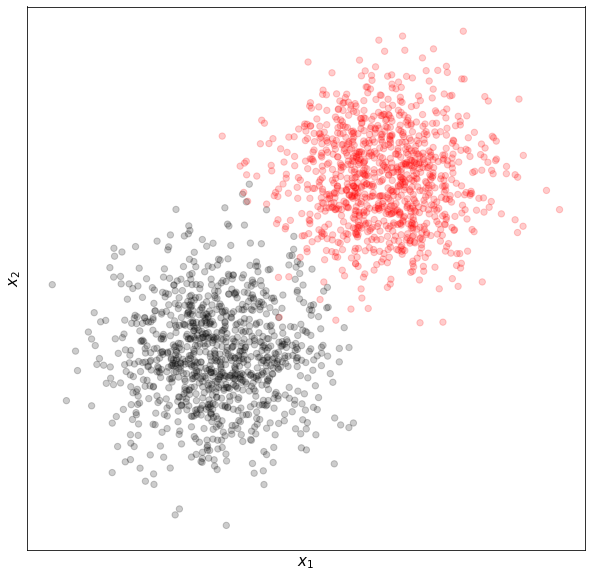

In [3]:
# Gráfico de las bolas
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=40, alpha=0.2)

ax.set_xticks([])
ax.set_yticks([])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
ax.set_xlabel(f"$x_1$", **font)
ax.set_ylabel(f"$x_2$", **font)
plt.show()

In [4]:
# Datos de entrenamiento y prueba
(X_train_blobs, X_test_blobs,
y_train_blobs, y_test_blobs) = train_test_split(X_blobs, y_blobs, test_size=0.2, random_state=12357)

In [5]:
# Estimador y predictor
best_C_blobs = LogisticRegressionCV(Cs=np.linspace(1e-5, 100, 100))\
                                    .fit(X=X_train_blobs,
                                         y=y_train_blobs)\
                                    .C_[0]

logr_blobs = LogisticRegression(C=best_C_blobs, solver='liblinear')

# Entrenamiento
logr_blobs.fit(X_train_blobs, y_train_blobs)

LogisticRegression(C=1.010110909090909, solver='liblinear')

In [6]:
logr_blobs.coef_

array([[0.42634205, 0.40334542]])

In [7]:
logr_blobs.intercept_

array([-6.87969451])

In [8]:
print(f"score train = {logr_blobs.score(X=X_train_blobs, y=y_train_blobs)}")
print(f"score test  = {logr_blobs.score(X=X_test_blobs,  y=y_test_blobs)}")

score train = 0.990625
score test  = 0.995


Veamos gráficamente la clasificación realizada por el modelo.

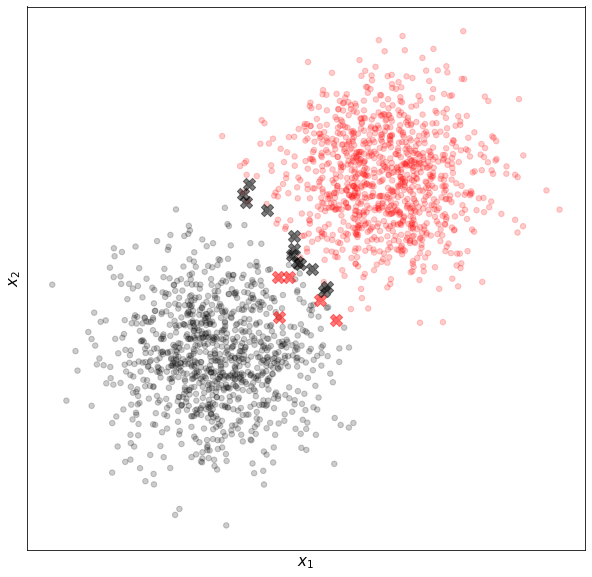

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

# predicciones malas
X_blobs_bad_ped, y_blobs_bad_pred = (X_blobs[y_blobs!=logr_blobs.predict(X_blobs)], 
                                     y_blobs[y_blobs!=logr_blobs.predict(X_blobs)])

# plot todos los puntos
ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=30, alpha=0.2)

# plot malas predicciones
for i in range(len(y_blobs_bad_pred)):
    ax.scatter(X_blobs_bad_ped[:,0][i], X_blobs_bad_ped[:,1][i],
               c=["black" if y_blobs_bad_pred[i]==0 else "red"],
               marker="X",
               s=150, alpha=0.5)

ax.set_xticks([])
ax.set_yticks([])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
ax.set_xlabel(f"$x_1$", **font)
ax.set_ylabel(f"$x_2$", **font)
plt.show()

Como se pude ver en el gráfico, los errores de clasificación se producen justo en la frontera entre los dos grupos. Las "$X$" en rojo son muestras de la clase roja mal clasificada (como negras), las "$X$" negras son muestras negras clasificadas como rojas. 

La frontera de decición en realidad está determinada por probabilidades de pertenecer a una u otra clase, veamos esto gráficamente.

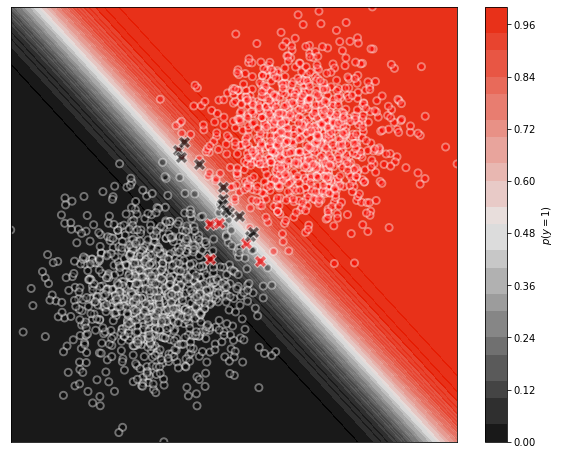

In [10]:
xx, yy = np.meshgrid(
                    np.linspace(min(X_blobs[:,0]), max(X_blobs[:,0]), 100),
                    np.linspace(min(X_blobs[:,1]), max(X_blobs[:,1]), 100)
                    )

ps = (logr_blobs.predict_proba(
                        X=np.c_[xx.flatten(), yy.flatten()]
                              )[:,1]
               .reshape(len(xx), len(yy))
     )

# plot de contorno
# mapa de color personalizado
from matplotlib.colors import LinearSegmentedColormap
fig, ax = plt.subplots(figsize=(10,8))

colors = [(0, 0, 0), (0.9, 0.9, 0.9), (0.9, 0.1, 0)]
cm = LinearSegmentedColormap.from_list("Custom", colors, N=20)

contour = ax.contourf(xx, yy, ps, levels=50, cmap=cm, vmin=0, vmax=1, alpha=0.9)
fig.colorbar(contour).set_label("$p(y = 1)$")

# plot todos los puntos
ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=50, alpha=0.4, edgecolor="white", linewidth=1.9)

# plot malas predicciones
for i in range(len(y_blobs_bad_pred)):
    ax.scatter(X_blobs_bad_ped[:,0][i], X_blobs_bad_ped[:,1][i],
               c=["black" if y_blobs_bad_pred[i]==0 else "red"],
               marker="X",
               s=150, alpha=0.5, edgecolor="white", linewidth=1.2)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

Donde se debe recordar que la clase positiva es $1$ por lo cual son estas las probabilidades que se deben utilizar.

### Análisis del hiperparámetro $C$ sobre loes coeficientes.

Como se dijo anteriormente, el hiperparámetro $C$ determina qué tanto cree el modelo en los datos de entrenamiento. Un valor pequeño de $C$ indica poca confianza en ellos por lo que la regularización se hace mayor produciendo mas coeficientes nulos, un valor grande de $C$ implicaría mayor confianza en los datos y consecuentemente una regularización más debil por lo cual tendríamos un modelo más complejo, con menos coeficientes nulos.

In [11]:
coefs_logr_blobs_l1 = []
coefs_logr_blobs_l2 = []
coefs_logr_blobs_en = []

Cs = np.logspace(-10, 8, 100)

for c in Cs:
    (coefs_logr_blobs_l1.append(
                    LogisticRegression(C=c, penalty="l2", solver='liblinear')
                    .fit(X_train_blobs, y_train_blobs)
                    .coef_[0]
                           )
    )
    
    (coefs_logr_blobs_l2.append(
                    LogisticRegression(C=c, penalty="l1", solver='liblinear')
                    .fit(X_train_blobs, y_train_blobs)
                    .coef_[0]
                           )
    )
    
    (coefs_logr_blobs_en.append(
                    LogisticRegression(C=c,
                                       penalty="elasticnet", solver='saga',
                                       l1_ratio=0.5, max_iter=int(1e6))
                    .fit(X_train_blobs, y_train_blobs)
                    .coef_[0]
                           )
    )
    
coefs_logr_blobs_l1 = np.array(coefs_logr_blobs_l1)
coefs_logr_blobs_l2 = np.array(coefs_logr_blobs_l2)
coefs_logr_blobs_en = np.array(coefs_logr_blobs_en)

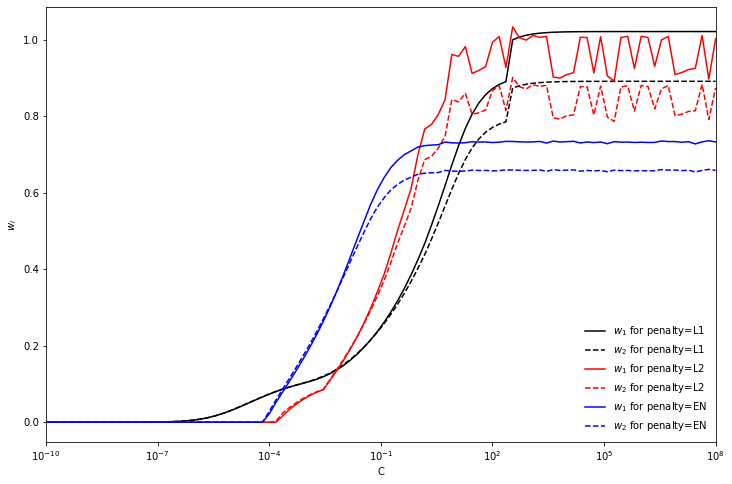

In [12]:
# plot
fig, ax = plt.subplots(figsize=(12,8))

i=0
inf_plot = [["$w_1$", "L1", "black", "-"],
            ["$w_2$", "L1", "black", "--"],
            ["$w_1$", "L2", "red", "-"],
            ["$w_2$", "L2", "red", "--"],
            ["$w_1$", "EN", "blue", "-"],
            ["$w_2$", "EN", "blue", "--"]]

for curves_i in coefs_logr_blobs_l1, coefs_logr_blobs_l2, coefs_logr_blobs_en:
    for coefs in curves_i.T:
        ax.plot(Cs, coefs,
                color=inf_plot[i][2],
                label=f"{inf_plot[i][0]} for penalty={inf_plot[i][1]}", linestyle=inf_plot[i][3])
        i+=1


ax.set_xlim(min(Cs), max(Cs))
ax.set_xlabel("C")
ax.set_ylabel(f"$w_i$")
ax.set_xscale("log")

plt.legend(frameon=False, ncol=1, loc="lower right")
plt.show()

Como se puede ver, para valores pequeños de $C$ los coeficientes tienden a ser nulos, dando esto un modelo menos complejo. 

## Clasificación multiclase

En el ejemplo anterior se realizó una clasificación binaria, pero <code>LogisticRegression</code> nos permite realizar también clasificaciones multiclase mediante una de dos estrategias <code>ovr</code> o <code>multinomial</code>.

   * <code>ovr</code> O "*One Versus Rest*", consiste en solucionar un problema binario para cada clase,
     al igualque se hizo anteriormente.
   * <code>multinomial</code> Realiza una 
   [regresión logística multiclase o regresión multinomial]("https://en.wikipedia.org/wiki/Multinomial_logistic_regression"). 
  

### Ejemplo 

Ahora vamos a utilizar la base de datos <code>mnist_784</code> para realizar un modelo que nos permita predecir un determinado dígito. Esta contiene $70000$ imágenes de los dígitos de la base decimal escritos a mano con su respectivo label. Para este ejemplo, y con fin de minimizar el tiempo de ejecución, no se utilizará la totalidad de los datos. Las imágenes contienen pixeles que se encuentran en el rango $[0, 255]$, con el fin de simplificar los cálculos a la computadora se escalarán a un intervalo de $[0,1]$ mediante la herramienta <code>MinMaxScaler</code> de Sklearn.

In [13]:
data_digits = fetch_openml("mnist_784")

X_digits = MinMaxScaler().fit_transform(data_digits.data.values[:10000])
y_digits = data_digits.target[:10000]

X_digits.shape, y_digits.shape

((10000, 784), (10000,))

In [14]:
X_digits.min(), X_digits.max()

(0.0, 1.0)

Las imágenes son cuadradas por lo que cada una tiene dimensiones $28\times28$. Lo que nos da un vector de $784$ features por cada una. Antes de proceder veamos cómo están balanceados nuestros datos.

In [15]:
for label, count in zip(
                    np.unique(y_digits, return_counts=True)[0],
                    np.unique(y_digits, return_counts=True)[1]):
    print(f"dígito: {label} \t cantidad: {count}")

dígito: 0 	 cantidad: 1001
dígito: 1 	 cantidad: 1127
dígito: 2 	 cantidad: 991
dígito: 3 	 cantidad: 1032
dígito: 4 	 cantidad: 980
dígito: 5 	 cantidad: 863
dígito: 6 	 cantidad: 1014
dígito: 7 	 cantidad: 1070
dígito: 8 	 cantidad: 944
dígito: 9 	 cantidad: 978


In [16]:
X_digits.shape

(10000, 784)

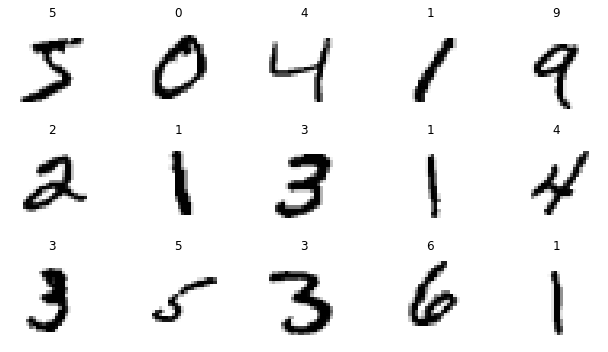

In [17]:
# Representación gráfica de los dígitos
n_rows = 3
n_cols = 5
n_img  = n_rows*n_cols

plt.figure(figsize=(2*n_cols-1, 2*n_rows-1))

for i, (img, label) in enumerate(zip(X_digits[0:n_img], y_digits[0:n_img])):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(img.reshape(int(np.sqrt(X_digits[0].shape[0])), -1), cmap="binary")
    plt.title(f"{label}")
    plt.axis(False)
    
plt.tight_layout()
plt.show()

In [18]:
# Datos de entrenamiento y prueba
(X_train_dig, X_test_dig,
 y_train_dig, y_test_dig) = train_test_split(X_digits, y_digits, test_size=0.2, random_state=12357)

X_train_dig.shape, y_train_dig.shape, X_test_dig.shape, y_test_dig.shape 

((8000, 784), (8000,), (2000, 784), (2000,))

In [19]:
# Estimador y predictor
best_C_dig = LogisticRegressionCV(Cs=np.linspace(1e-5, 20, 10), max_iter=int(1e4))\
                                    .fit(X=X_train_dig,
                                         y=y_train_dig)\
                                    .C_[0]
print("Aquí voy")
logr_dig = LogisticRegression(C=best_C_dig, solver='lbfgs', multi_class='multinomial', max_iter=int(1e5))

# Entrenamiento
logr_dig.fit(X_train_dig, y_train_dig)

Aquí voy


LogisticRegression(C=2.2222311111111113, max_iter=100000,
                   multi_class='multinomial')

In [20]:
print(f"score train = {logr_dig.score(X=X_train_dig, y=y_train_dig)}")
print(f"score test  = {logr_dig.score(X=X_test_dig,  y=y_test_dig)}")

score train = 0.985875
score test  = 0.8925


Probemos el modelo con datos del conjunto de entrenamiento.

In [21]:
n_test = 10
errors = 0
for i, img_test in enumerate(X_test_dig[0:n_test]):
    (print(f"Real_label = {y_test_dig.values[i]}" + "\t"
           f"pred_label = {logr_dig.predict(img_test.reshape(1,-1))[0]}")
    )
    
    if int(y_test_dig.values[i])!= int(logr_dig.predict(img_test.reshape(1,-1))[0]):
        errors+=1
        
print(f"\nErrores = {errors}\terrores/total = {errors/n_test}")

Real_label = 5	pred_label = 3
Real_label = 0	pred_label = 0
Real_label = 3	pred_label = 3
Real_label = 0	pred_label = 0
Real_label = 5	pred_label = 4
Real_label = 2	pred_label = 2
Real_label = 8	pred_label = 8
Real_label = 2	pred_label = 2
Real_label = 7	pred_label = 7
Real_label = 7	pred_label = 7

Errores = 2	errores/total = 0.2


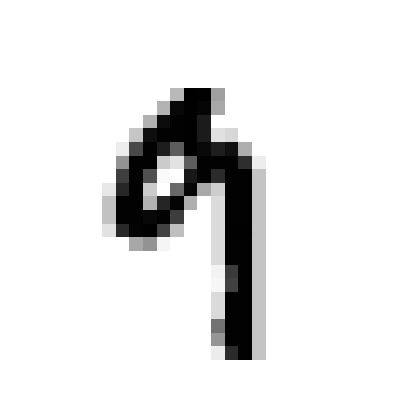

In [22]:
fig, ax = plt.subplots(figsize=(7,7))

n = 123
ax.imshow(X_test_dig[n].reshape(int(np.sqrt(X_test_dig[n].shape[0])), -1), cmap="binary")
ax.axis("off")
plt.show()

In [23]:
logr_dig.predict(X_test_dig[n].reshape(1,-1))

array(['9'], dtype=object)

## Problemas de clasificación no lineales con  <code>LogisticRegression</code>

La regresión logística, como se dijo inicialmente, permite solucionar problemas de clasificación donde la frontera de decisión es un hiperplano n-dimensional, pero es posible hacer un cambio en la dimensionalidad de problemas no lineales de modo que sea posible convertirlos en lineales, esto se hace aplicando alguna función $f(x_1, x_2,...)$ sobre las features iniciales. A esta función se le llama **kernel** y es parte de la idea del funcionamiento detrás de las máquinas de soporte vectorial *SVM* que se verán más adelante.

Para ejemplificar esto veamos el siguiente problema de clasificación.

In [24]:
X_circles, y_circles = make_circles(n_samples=10000, factor=0.5, noise=0.09)

In [25]:
X_circles, y_circles

(array([[ 0.60280852,  0.10346854],
        [ 0.10001525, -0.88004461],
        [ 0.81595485,  0.60533267],
        ...,
        [ 0.18919428,  0.41286725],
        [-0.53208888,  0.85902005],
        [ 0.40647976, -0.80309091]]),
 array([1, 0, 0, ..., 1, 0, 0]))

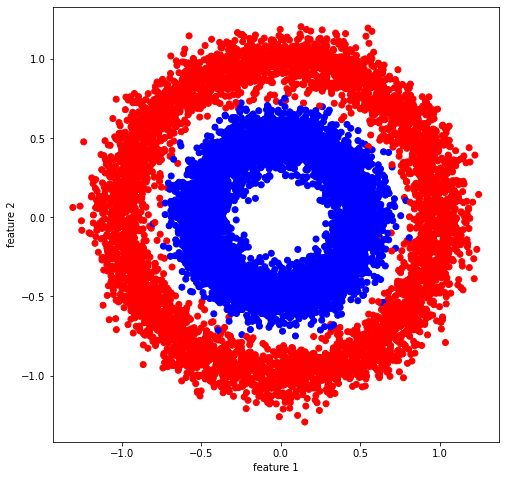

In [26]:
fig, ax = plt.subplots(figsize=(8,8))

c = ["red" if i==0 else "blue" for i in y_circles]
ax.scatter(X_circles[:,0], X_circles[:,1], c=c)

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
plt.show()

Claramente no ha una linea recta que nos permita separar las dos clases. Vamos entonces a adherir una tercera feature que será la suma de los cuadrados de las features iniciales $z(x,y)=x_1^2+x_2^2$.

In [27]:
a = 0
Z_circles = X_circles[:,0]**2+X_circles[:,1]**2 + a

In [28]:
X_circles_p = np.c_[X_circles, Z_circles]
X_circles_p

array([[ 0.60280852,  0.10346854,  0.37408385],
       [ 0.10001525, -0.88004461,  0.78448156],
       [ 0.81595485,  0.60533267,  1.03220997],
       ...,
       [ 0.18919428,  0.41286725,  0.20625384],
       [-0.53208888,  0.85902005,  1.02103403],
       [ 0.40647976, -0.80309091,  0.8101808 ]])

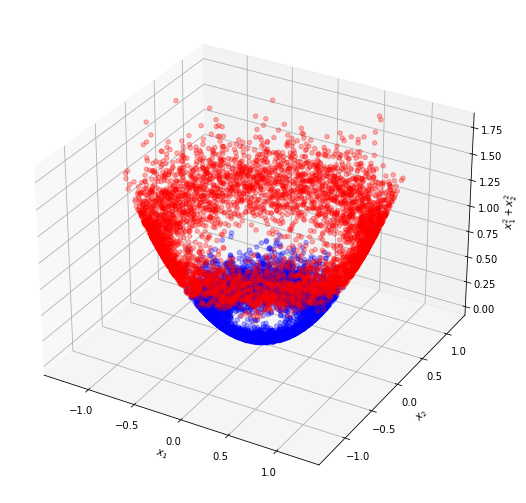

In [29]:
#%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9,9))

ax.scatter3D(xs=X_circles_p[:,0], ys=X_circles_p[:,1], zs=X_circles_p[:,2], color=c, alpha=0.3)
ax.set_xlabel(f"$x_1$")
ax.set_ylabel(f"$x_2$")
ax.set_zlabel(f"$x_1^2+x_2^2$")
plt.show()

In [30]:
# Datos de entrenamiento y testeo
(X_train_circles, X_test_circles,
y_train_circles, y_test_circles) = train_test_split(X_circles_p, y_circles, test_size=0.2, random_state=12357)

# mejor C
best_C_circles = LogisticRegressionCV(Cs=np.linspace(1e-5, 100, 1000), max_iter=int(1e4))\
                                    .fit(X=X_train_circles,
                                         y=y_train_circles)\
                                    .C_[0]

print(best_C_circles)

# Entrenamiento
logr_circles = LogisticRegression(C=best_C_circles).fit(X_train_circles, y_train_circles)

# Testeo
print(f"score = {logr_circles.score(X=X_train_circles, y=y_train_circles)}")
print(f"score = {logr_circles.score(X=X_test_circles, y=y_test_circles)}")

21.62162945945946
score = 0.99625
score = 0.9975


In [31]:
logr_circles.coef_

array([[  0.21762414,  -0.35079589, -29.76411984]])

In [32]:
logr_circles.intercept_

array([17.21112268])

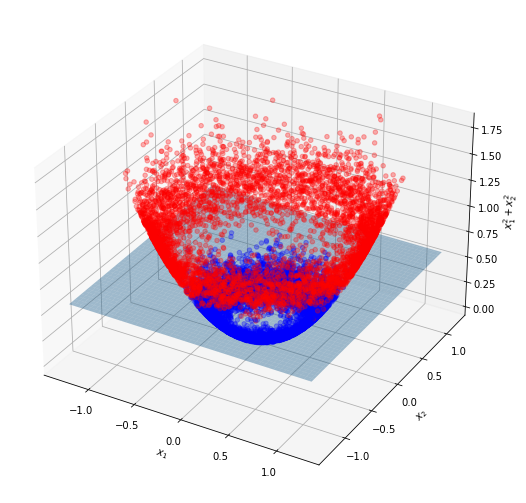

In [33]:
# plano
xx, yy = np.meshgrid(
                    np.linspace(min(X_circles_p[:,0]), max(X_circles_p[:,0]), 100),
                    np.linspace(min(X_circles_p[:,1]), max(X_circles_p[:,1]), 100)
                    )
zz = (logr_circles.coef_[0][0]*xx + logr_circles.coef_[0][1]*yy - logr_circles.intercept_)/logr_circles.coef_[0][2]

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9,9))
ax.scatter3D(xs=X_circles_p[:,0], ys=X_circles_p[:,1], zs=X_circles_p[:,2], color=c, alpha=0.3)
ax.plot_surface(X=xx, Y=yy, Z=zz, alpha=0.4)

ax.set_xlabel(f"$x_1$")
ax.set_ylabel(f"$x_2$")
ax.set_zlabel(f"$x_1^2+x_2^2$")
plt.show()

Es posible utilizar este ajuste para "devolvernos" al problema inicial y graficar la frontera 2D de decisión, que ahora no sería una linea recta. Para hacer esto podemos hacer uso del método <code>decision_function</code> de <code>LogisticRegression</code> y generar una matriz con el valor de la función de decisión para todo el plano. La frontera 2D estará dada por aquellos puntos donde la función de decisión es igual a $0$ pues es allí donde se cumple que $w_1x_1+w_2x_2+w_3x_3-w_0=0$.  

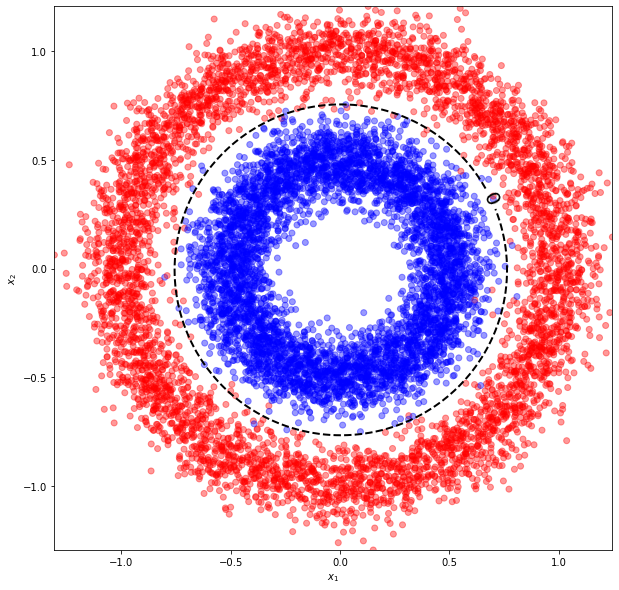

In [34]:
fig, ax = plt.subplots(figsize=(10,10))

# Función de decisión evaluada en todo el espacio
xx, yy = np.meshgrid(np.linspace(min(X_circles[:,0]), max(X_circles[:,0]), 100),
                     np.linspace(min(X_circles[:,1]), max(X_circles[:,1]), 100)
                    )

zz = logr_circles.decision_function(X=np.c_[xx.flatten(),
                                            yy.flatten(),
                                            (xx**2 + yy**2).flatten()
                                           ]).reshape(xx.shape)

# Gráfico de contorno
# La frontera de decisión está dada por los puntos del plano donde la función de decisión es 0.
des_func_level = [0]
CS = ax.contour(xx, yy, zz,
           levels=des_func_level,
           linestyles=["--"], colors=["k"], linewidths=[2])

ax.clabel(CS, fontsize=20)

# Puntos
c = ["red" if i==0 else "blue" for i in y_circles]
ax.scatter(X_circles[:,0], X_circles[:,1], c=c, alpha=0.4)

ax.set_xlabel(f"$x_1$")
ax.set_ylabel(f"$x_2$")
plt.show()

## Máquinas de soporte vectorial <code>SVM</code>

Las máquinas de soporte vectorial o Support Vector Machines (SVM) del inglés, son uno de los algoritmos más ampliamente utilizados en el mundo del Machine Learning por su excelente desempeño y solidez matemática. Son algoritmos diseñados especialmente para problemas de clasificación pero también cuentan con su versión para regresión. Sin dar mayores detalles, a continuación se ilustra la idea central detrás de las SVM para el caso de una clasificación binaria de dos clases linealmente separables. 

Imaginemos que tenemos dos clases a ser clasificadas, la positiva y la negativa como se aprecia a continuación:

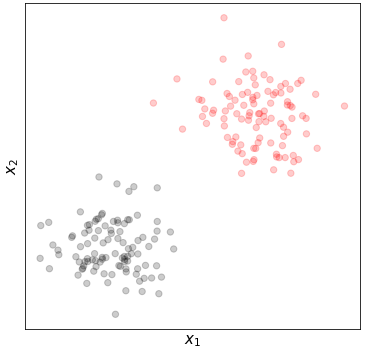

Pues bien, una recta que separe las dos clases estaría resolviendo el problema de clasificación. Pero existe un problema, al igual que con un perceptrón, existen infinitas rectas que podrían separar dichas clases

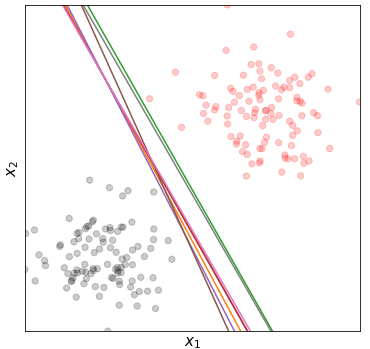

Las SVM buscan encontrar la recta óptima que separa las dos clases. Para esto utilizan los conocidos como Vectores de Soporte, que se podrían pensar como las muestras en la frontera de la clasificación. El objetivo es maximizar la distancia entre estas fronteras conocida como *margen*. 

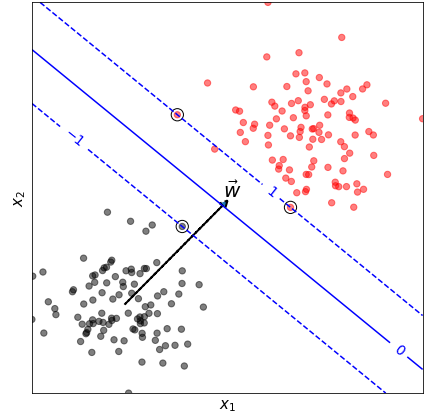

En el gŕafico arriba, los vectores de soporte están representados por los puntos encerrados en negro. La recta justo en el medio representa los mejores coeficientes $w_i$ obtenidos para este modelo $w_1x_1+w_2x_2+w_0=0$, la cual en el caso n-dimensional en realidad representa un hiperplano. A continuación mostraremos de manera sencilla cómo obtener la expresión a optimizar a partir del vector $\textbf w = (w_1, w_2)$. Un punto bajo la frontera será clasificado como de la clase $-1$, un punto por encima será clasificado como perteneciente a la clase $1$. Sean estos puntos $\textbf x_{-}$ y $\textbf x_{+}$ respectivamente. Llamemos $d$ a la distancia entre los hiperplanos que definen la margen. 

Para los puntos $\textbf x_{-}$ y $\textbf x_{+}$ se cumple que:

\begin{equation}
    \textbf w \cdot \textbf x_{-} + w_0 < 0 \\
    \textbf w \cdot \textbf x_{+} + w_0 > 0
\end{equation}

Un punto justo sobre la frontera de decisión cumpliría $w_1x_1+w_2x_2+w_0=0$. Los planos paralelos al plano que define la frontera de decisión deben cumplir que

\begin{equation}
    \textbf w \cdot \textbf x_{-} + w_0 = -1 \\
    \textbf w \cdot \textbf x_{+} + w_0 =  1
\end{equation}

Para calcular la distancia $d$ entre los hiperplanos consideremos el siguiente diagrama:
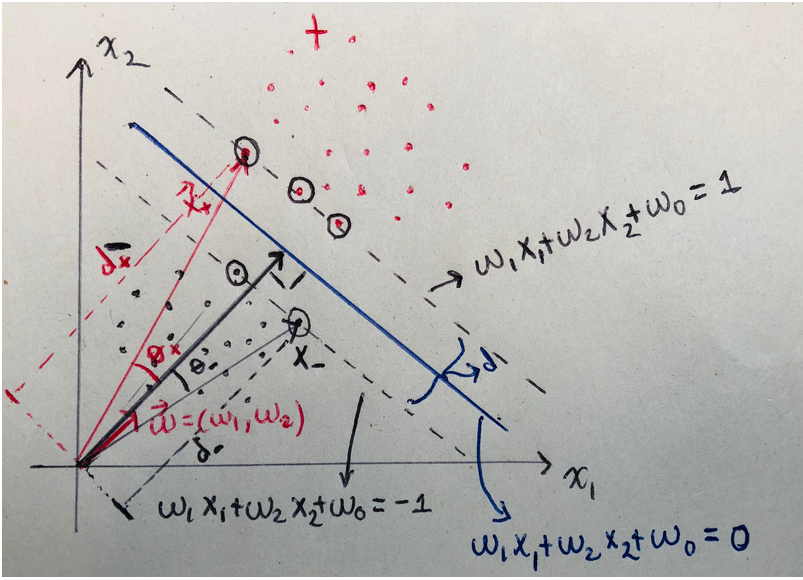

De él podemos concluir que un vector de soporte que sea clasificado como de la clase $1$ ($+$) deberá cumplir lo siguiente: 

\begin{equation}
    \textbf w \cdot \textbf x_{+} = |\textbf w||\textbf x_{+}|\cos\theta_{+} \\
\end{equation}

pero del diagrama se deduce que $d_{+}=|\textbf x_{+}|\cos\theta_{+}$, por lo que obtenemos:

\begin{equation}
   d_{+} = \frac{ \textbf w \cdot \textbf x_{+}}{|\textbf w|}
\end{equation}

Iguales argumentos pero para un vector de soporte en la clase negativa $\textbf x_{-}$ dan como resultado:

\begin{equation}
   d_{-} = \frac{ \textbf w \cdot \textbf x_{-}}{|\textbf w|}
\end{equation}

La distancia $d$ está dada entonces por:

\begin{equation}
   d = \frac{1}{|\textbf w|}(d_{+}-d_{-})
\end{equation}
\begin{equation}
   d = \frac{1}{|\textbf w|}(\textbf w \cdot \textbf x_{+}-\textbf w \cdot \textbf x_{-})
\end{equation}

Pero a partir de las condiciones para los vectores de soporte se obtine que $\textbf w \cdot \textbf x_{-} = -1 - w_0$ y $\textbf w \cdot \textbf x_{+} = 1 - w_0$, remplazando en  $d$ se  obtiene:

\begin{equation}
   d = \frac{1}{|\textbf w|}(1 - w_0 - (-1 - w_0))
\end{equation}

\begin{equation}
   d = \frac{2}{|\textbf w|}
\end{equation}

Y esta es la expresión que se debe maximizar. En muchas ocasiones un problema de maximización o minimización tiene asociado uno contrario. En nuestro caso puntual maximizar $d$ es lo mismo que minimizar $|\textbf w|$, pero esta expresión viene acompañada de una raíz cuadráda que podría hacer los cálculos un poco menos agradables, afortunadamente las raíces cuadradas son funciones monótonas y minimizar una es lo mismo que minimizar su argumento, siendo así la función a minimizar será:

\begin{equation}
   \frac{1}{2}|\textbf w|^2
\end{equation}

estando sujeta a las condiciones anteriormente dichas para los vectores de soporte. Estas se pueden escribir en una única expresión como

\begin{equation}
    y_i(\textbf w \cdot \textbf x + w_0) = 1 \\
    y_i(\textbf w \cdot \textbf x + w_0) - 1 = 0
\end{equation}

donde $y_i$ toma valor positivo para la calse positiva y negativo para la clase negativa.Un problema de minimización sujeto a determinadas condiciones de frontera se puede rsolver utilizando los multiplicadores de Lagrange, tenemos entonces que:

\begin{equation}
    L(\textbf w, \lambda_i) = \frac{1}{2}|\textbf w|^2 + \sum_{i=1}^{n} \lambda_i [y_i(\textbf w \cdot \textbf x_i + w_0) - 1]
\end{equation}

siendo $\lambda_i$ los multiplicadores de Lagrange. La suma se hace sobre todos los vectores de soporte. Igualando a cero el gradiente del lagrangiano y reemplazando en $L$ se obtiene la expresión que finalmente se debe minimizar.
Esta es la lógica que siguen los algoritmos de SVM para problemas donde la frontera de clasificación es un hiperplano. Cuando las clases ya no son separables linealmente existe un truco conocido como [truco del kernel]("https://en.wikipedia.org/wiki/Kernel_method") que permite mapear las features a un espacio de mayor dimensión donde el problema se vuelve linealmente separable. Un ejemplo de esto último lo ilustramos en la anterior sección al tratar de aplicar <code>LogisticRegression</code> a un problema de clasificación binaria no lineal, la solución fue adherir una nueva dimensión al problema lo que nos permitió resolverlo eficazmente. 

A continuación se analiza la solución a problemas de clasificación mediante SVMs.  

In [35]:
# Generación de los datos
blobs_centers = [(0,0), (20,20)]
X_blobs, y_blobs = make_blobs(n_samples=[100,100], 
                              centers=blobs_centers,
                              n_features=2,
                              cluster_std=4.5,
                              shuffle=True,
                              random_state=13)

df_blobs = pd.DataFrame(dict(x=X_blobs[:,0], y=X_blobs[:,1], label=y_blobs))
df_blobs

,x,y,label
0,-3.408647,-2.298718,0
1,-1.427697,5.122499,0
2,-1.535045,4.904307,0
3,-3.205758,3.391949,0
4,1.617895,-2.303843,0
...,...,...,...
195,1.581127,3.548567,0
196,25.377614,13.423224,1
197,17.099214,14.733900,1
198,15.931528,23.162390,1


In [36]:
# Datos de entrenamiento y prueba
(X_train_blobs, X_test_blobs,
y_train_blobs, y_test_blobs) = train_test_split(X_blobs, y_blobs, test_size=0.2, random_state=12357)

In [37]:
svc_blobs = SVC(kernel="linear")
svc_blobs.fit(X_train_blobs, y_train_blobs)

SVC(kernel='linear')

In [38]:
svc_blobs.support_vectors_

array([[ 6.07637698,  9.06849371],
       [ 5.55306141, 22.1499474 ],
       [17.59927474, 11.30439799]])

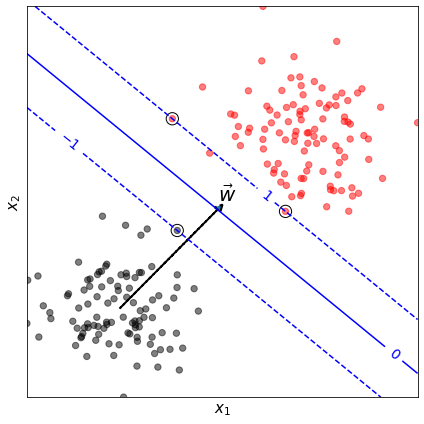

In [87]:
# Gráfico
fig, ax = plt.subplots(figsize=(6,6))

# Todos los puntos
ax.scatter(X_blobs[:,0], X_blobs[:,1],
           c=["black" if i==0 else "red" for i in y_blobs],
           s=40, alpha=0.5)

# Vectores de soporte
ax.scatter(svc_blobs.support_vectors_[:,0], svc_blobs.support_vectors_[:,1], linewidth=1,
    facecolors="none",
    edgecolors="k", s=150)

# Margenes y bestfit
xx, yy = np.meshgrid(np.linspace(X_blobs[:,0].min(), X_blobs[:,0].max(), 50), 
                     np.linspace(X_blobs[:,1].min(), X_blobs[:,1].max(), 50))

zz     = svc_blobs.decision_function(np.c_[xx.flatten(), yy.flatten()]).reshape(xx.shape)

CS = ax.contour(xx, yy, zz, levels=[-1,0,1], linestyles=["--", "-", "--"], colors=["blue"])
ax.clabel(CS, fontsize=14)

# Vector w
#ax.plot(x_, -(svc_blobs.intercept_[0]+svc_blobs.coef_[0][0]*x_)/svc_blobs.coef_[0][1], "green", linestyle="--")
#x_ = np.linspace(X_blobs[:,0].min(), X_blobs[:,0].max(), 50)
d_ = abs( svc_blobs.intercept_[0]/np.sqrt(svc_blobs.coef_[0].dot(svc_blobs.coef_[0])))
uw = (svc_blobs.coef_[0][0], svc_blobs.coef_[0][1])/np.sqrt(svc_blobs.coef_[0].dot(svc_blobs.coef_[0]))

ax.arrow(0, 0, d_*uw[0], d_*uw[1], head_width=0.8, head_length=0.8, lw=2, ls="--")
ax.text(d_*uw[0]+0.01, d_*uw[1]+1, f"$\\vec w$", fontsize=20)

# costum
ax.set_xticks([])
ax.set_yticks([])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 15}
ax.set_xlim(X_blobs[:,0].min(), X_blobs[:,0].max())
ax.set_ylim(X_blobs[:,1].min(), X_blobs[:,1].max())

ax.set_xlabel(f"$x_1$", **font)
ax.set_ylabel(f"$x_2$", **font)
plt.tight_layout()
plt.show()

In [47]:
svc_blobs.coef_

array([[0.14272841, 0.15852925]])

In [50]:
svc_blobs.intercept_

array([-3.30429398])

In [51]:
svc_blobs.coef0

0.0

In [69]:
 d_*svc_blobs.coef_[0][0]

2.2109018527658857

0.04550292332251045

In [64]:
svc_blobs.coef_[0]

array([0.14272841, 0.15852925])

In [73]:
uw = (svc_blobs.coef_[0][0], svc_blobs.coef_[0][1])/np.sqrt(svc_blobs.coef_[0].dot(svc_blobs.coef_[0]))
uw.dot(uw)

1.0